# Probability

### Basic Probability Theory

#### A dice experiment

In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
from d2l import tensorflow as d2l

Matplotlib is building the font cache; this may take a moment.


In [2]:
fair_probs = tf.ones(6) / 6
fair_probs, tf.reduce_sum(fair_probs)

(<tf.Tensor: shape=(6,), dtype=float32, numpy=
 array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>)

In [4]:
# drawing single sample
tfp.distributions.Multinomial(1, fair_probs).sample()

<tf.Tensor: shape=(6,), dtype=float32, numpy=array([0., 0., 0., 1., 0., 0.], dtype=float32)>

In [5]:
# drawing multiple samples
count = tfp.distributions.Multinomial(1000, fair_probs).sample()

In [6]:
count, count / tf.reduce_sum(count)

(<tf.Tensor: shape=(6,), dtype=float32, numpy=array([180., 172., 154., 177., 160., 157.], dtype=float32)>,
 <tf.Tensor: shape=(6,), dtype=float32, numpy=array([0.18 , 0.172, 0.154, 0.177, 0.16 , 0.157], dtype=float32)>)

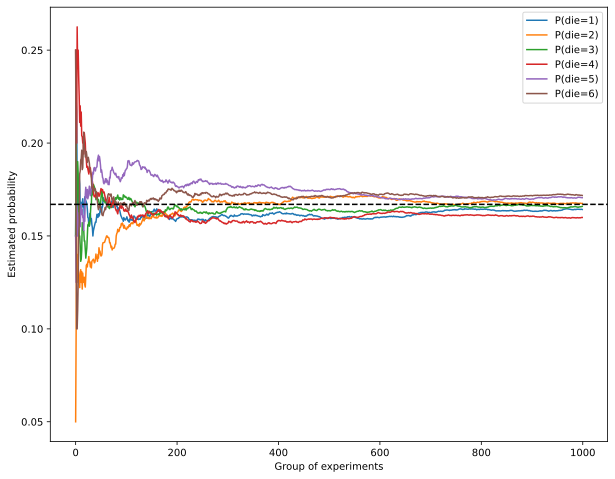

In [7]:
counts = tfp.distributions.Multinomial(20, fair_probs).sample(1000)
cum_counts = tf.cumsum(counts, axis=0)
estimates = cum_counts / tf.reduce_sum(cum_counts, axis=1, keepdims=True)

d2l.set_figsize((10, 8))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(), label=(f"P(die={str(i+1)})"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel("Group of experiments")
d2l.plt.gca().set_ylabel("Estimated probability")
d2l.plt.legend()

In [8]:
tf.cumsum(counts, axis=0)

<tf.Tensor: shape=(1000, 6), dtype=float32, numpy=
array([[3.000e+00, 1.000e+00, 3.000e+00, 5.000e+00, 3.000e+00, 5.000e+00],
       [9.000e+00, 4.000e+00, 8.000e+00, 8.000e+00, 5.000e+00, 6.000e+00],
       [1.300e+01, 9.000e+00, 1.000e+01, 1.200e+01, 1.000e+01, 6.000e+00],
       ...,
       [3.281e+03, 3.343e+03, 3.307e+03, 3.192e+03, 3.406e+03, 3.431e+03],
       [3.283e+03, 3.346e+03, 3.313e+03, 3.196e+03, 3.409e+03, 3.433e+03],
       [3.285e+03, 3.350e+03, 3.318e+03, 3.199e+03, 3.412e+03, 3.436e+03]],
      dtype=float32)>

In [9]:
tf.reduce_sum(counts, axis=1, keepdims=True)

<tf.Tensor: shape=(1000, 1), dtype=float32, numpy=
array([[20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.],
       [20.

In [10]:
estimates

<tf.Tensor: shape=(1000, 6), dtype=float32, numpy=
array([[0.15      , 0.05      , 0.15      , 0.25      , 0.15      ,
        0.25      ],
       [0.225     , 0.1       , 0.2       , 0.2       , 0.125     ,
        0.15      ],
       [0.21666667, 0.15      , 0.16666667, 0.2       , 0.16666667,
        0.1       ],
       ...,
       [0.16437876, 0.16748497, 0.16568136, 0.15991984, 0.17064129,
        0.17189379],
       [0.16431431, 0.16746746, 0.16581582, 0.15995996, 0.17062062,
        0.17182182],
       [0.16425   , 0.1675    , 0.1659    , 0.15995   , 0.1706    ,
        0.1718    ]], dtype=float32)>

In [11]:
tf.reduce_sum(estimates, axis=1, keepdims=True)

1.        ],
       [0.99999994],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.99999994],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.99999994],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.99999994],
       [0.99999994],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.0000001 ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.99999994],
       [1.0000001 ],
       [1.        ],
       [1.        ],
       [1.0000001 ],
       [0.99999994],
       [1.        ],
       [1.        ],
       [0.99999994],
       [1.        ],
